# Data Cleaning

### Load Dependencies

In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import wordnet

### Initial Setup

In [2]:
import sys
import os

sys.path.append(os.path.abspath(".."))  # go to project root

### Load Dataset

In [3]:
data = pd.read_csv("../dataset/raw/training_data.csv", sep="\t", header=None)
df =data.copy()

pd.set_option('display.max_colwidth',100)
df.sample(5)

,0,1
25164,1,clinton holds slim lead over trump in presidential race: polls
6054,0,racist prick spits on black pair
24910,1,how hillary clinton's white voters melted away
27936,1,obama predicts congress will lift cuba embargo under next president: cnn
8752,0,yes


In [4]:
df.columns = ['label', 'news_headline']

# Move label column to End
col = df.pop('label')
df['label'] = col

In [5]:
df.shape

(34152, 2)

In [6]:
# Check Class distribution
df['label'].value_counts()

label
0    17572
1    16580
Name: count, dtype: int64

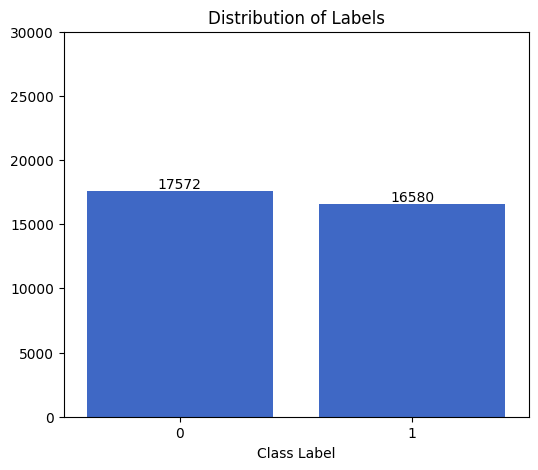

In [7]:
plt.figure(figsize=(6, 5))

counts = df['label'].value_counts().sort_index()
ax = sns.countplot(data=df, x='label', color="#295FDB")

plt.xlabel("Class Label")
plt.ylabel("")
plt.title("Distribution of Labels", fontsize= 12)
plt.xticks([0, 1])
plt.yticks()
plt.ylim(0, 30000)

# Add values on top of bars
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}",
                (p.get_x() + p.get_width()/ 2., p.get_height()),
                ha = 'center',
                va = 'bottom'
                )
plt.show()

### Data Cleaning

In [8]:
# Split the dataset
X = df['news_headline']                             # features
y = df['label']                                     # target
pd.set_option('display.max_colwidth',100)
X.sample(5)

19676                                    trump makes no decision on afghanistan strategy
28722    michigan governor will be called to congressional hearing on flint water crisis
5899     fl governor refuses to acknowledge mass shooting as anti-gay hate crime (video)
31308                       little prospect of syria peace progress seen in geneva talks
22937                          the trump presidency on feb. 17 at 3:49 p.m. est/2049 gmt
Name: news_headline, dtype: str

### Cleaning Steps

In [9]:
# Check for HTML links
X[X.str.contains(r"https?://\S+.\w", regex=True)]

9337     https://100percentfedup.com/served-roy-moore-vietnamletter-veteran-sets-record-straight-honorabl...
15184               https://100percentfedup.com/video-hillary-asked-about-trump-i-just-want-to-eat-some-pie/
15185    https://100percentfedup.com/12-yr-old-black-conservative-whose-video-to-obama-went-viral-do-you-...
15468                             https://fedup.wpengine.com/wp-content/uploads/2015/04/hillarystreetart.jpg
15469                                     https://fedup.wpengine.com/wp-content/uploads/2015/04/entitled.jpg
16970                             https://fedup.wpengine.com/wp-content/uploads/2015/04/hillarystreetart.jpg
16971                                     https://fedup.wpengine.com/wp-content/uploads/2015/04/entitled.jpg
Name: news_headline, dtype: str

In [10]:
from src.data_preprocess import TextPreprocessor

process = TextPreprocessor()

print("=== Before Cleaning ===")
print(X.iloc[14158])
print(X.iloc[9337])

# Apply preprocessing
X = X.apply(process.preprocess)

print("\n=== After Cleaning ===")
print(X.iloc[14158])
print(X.iloc[9337])

=== Before Cleaning ===
what donald trump learned from his german grandpa friedrich drumpf
https://100percentfedup.com/served-roy-moore-vietnamletter-veteran-sets-record-straight-honorable-decent-respectable-patriotic-commander-soldier/

=== After Cleaning ===
donald trump learned german grandpa friedrich drumpf
serve roy moore vietnamletter veteran set record straight honorable decent respectable patriotic commander soldier


In [11]:
pd.set_option('display.max_colwidth',100)
X.sample(5)

11435    law unintended consequence strong arm tactic anti capitalist left could destroy million american...
20694                                                  democrat protest senate republican healthcare secrecy
23824                                            uk johnson raise hackle ww punishment beating jibe hollande
9411                        shock comment trump expose intelligence committee schiff put country first video
27172                                      exclusive trump surge support almost even clinton national u poll
Name: news_headline, dtype: str

In [12]:
df = pd.concat([X, y], axis=1)
df.head()

,news_headline,label
0,donald trump sends embarrass new year eve message disturbing,0
1,drunk brag trump staffer start russian collusion investigation,0
2,sheriff david clarke become internet joke threaten poke people eye,0
3,trump obsess even obama name cod website image,0
4,pope francis call donald trump christmas speech,0


In [13]:
df[df['news_headline']==""].count()

news_headline    9
label            9
dtype: int64

In [14]:
df = df[df['news_headline']!=""]

In [15]:
df.tail(5)

,news_headline,label
34147,tear rain thais gather late king funeral,1
34148,pyongyang university need non u teacher travel ban leaf staff shortage,1
34149,philippine president duterte visit japan ahead key regional summit,1
34150,japan abe may election many want pm,1
34151,demoralize divide inside catalonia police force,1


In [16]:
data.tail(5)

,0,1
34147,1,tears in rain as thais gather for late king's funeral
34148,1,pyongyang university needs non-u.s. teachers as travel ban leaves staff shortages
34149,1,philippine president duterte to visit japan ahead of key regional summits
34150,1,japan's abe may have won election\tbut many don't want him as pm
34151,1,demoralized and divided: inside catalonia's police force


* After cleaning we can verify that records are similar to original dataset.

* This means that we can store them safely.

In [ ]:
df.to_csv("../dataset/processed/clean_dataset.csv", index=False, sep=",")